**Importing Libraries**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Data Preprocessing** 


In [0]:
training_data = pd.read_csv("Train.csv")
X_test=pd.read_csv('Test.csv')

In [51]:
training_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [52]:
y = training_data.iloc[:, -1].values
print(y.shape)

(1600,)


In [53]:
y = y.reshape(1600, 1)
print(y.shape)

(1600, 1)


In [0]:
X = training_data.iloc[:, :-1]

In [0]:
ones = np.ones([X.shape[0], 1])
onesf=np.ones([X_test.shape[0],1])

In [56]:
X = np.concatenate((ones, X), axis = 1)
X_testf=np.concatenate((onesf,X_test),axis=1)
print(X)

[[ 1.          0.29341624 -0.94559871 -0.42110515  0.40681602  0.52566183]
 [ 1.         -0.83608408 -0.18922804 -0.77640262 -1.05383124  0.59799685]
 [ 1.          0.23642511  0.13283602 -0.14772298  0.69985396 -0.18736416]
 ...
 [ 1.          1.04417694 -0.89920649  1.73039905 -1.87105676  0.44251965]
 [ 1.         -1.2691729  -0.00505216  1.85766873 -1.08036482  0.73633394]
 [ 1.         -1.88400025 -0.84942743 -1.45227035  0.48861308  1.4595758 ]]


In [57]:
theta = np.zeros([1, 6])
print(theta)

[[0. 0. 0. 0. 0. 0.]]


**Cost Function**

In [0]:
def Costfunction(X,y,theta):
    cost_for_single_ex = np.power(((X @ theta.T) - y), 2)
    total_cost =  (np.sum(cost_for_single_ex))/(2*len(X))
    return total_cost

In [59]:
Costfunction(X,y,theta)

6128.065207016448

**Gradient Descent**

In [0]:
def GradientDescent(X,y,theta,iterations,alpha):
    cost = np.zeros(iterations)
    for i in range(iterations):
        theta = theta - (alpha/len(X))*np.sum(X*((X @ theta.T) - y), axis = 0)
        cost[i] = Costfunction(X,y,theta)
    return theta, cost

In [61]:
iterations = 200
alpha = 1
thetafinal, cost = GradientDescent(X,y,theta,iterations,alpha)
print(thetafinal)

[[ 4.99096674 29.68187118 92.66247759  8.28062089 44.76773522  2.51916121]]


In [62]:
finalcost = Costfunction(X,y,thetafinal)
print(finalcost)

207.7766577743083


Text(0.5, 1.0, 'Error vs. Training Epoch')

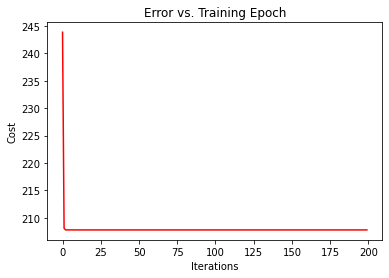

In [63]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iterations), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

**Prediction on training and test set**

In [0]:
Z_train = (X @ thetafinal.T) 
Z_test=(X_testf@thetafinal.T)

In [65]:
print(Z_train)

[[ -57.87196311]
 [ -89.46019557]
 [  53.95305942]
 ...
 [-115.65802541]
 [ -64.27649688]
 [-116.11442895]]


In [66]:
print(Z_test)

[[ 1.14583689e+02]
 [ 1.18012815e+02]
 [-2.17398523e+01]
 [-4.39368985e+01]
 [-9.59148984e+01]
 [-4.45074240e+01]
 [-7.55665260e+01]
 [ 2.38208355e+01]
 [ 1.73835284e+02]
 [ 1.72849290e+02]
 [-1.05402312e+02]
 [-2.08020234e+01]
 [-3.91323777e+00]
 [ 1.22999186e+02]
 [ 4.03078842e+01]
 [ 4.57128495e+01]
 [-1.89628491e+02]
 [ 2.26125454e+01]
 [ 1.16410473e+01]
 [ 1.36342143e+02]
 [ 6.49162552e+01]
 [-6.19884884e+01]
 [-1.08194679e+02]
 [-7.41212747e+00]
 [-5.85239528e+01]
 [ 1.18889777e+01]
 [ 2.92376400e+01]
 [ 1.07687579e+02]
 [ 2.41468563e+01]
 [-2.61050120e+01]
 [ 1.10968076e+02]
 [-4.48797096e+01]
 [ 2.16799939e+02]
 [-1.38606052e+01]
 [-2.28603182e+02]
 [ 1.54896021e+02]
 [-2.22583390e+00]
 [ 1.27230344e+01]
 [-3.08307877e+02]
 [ 7.71107583e+01]
 [-8.12079177e+01]
 [-2.06632925e+02]
 [-2.38762881e+02]
 [ 1.34757365e+02]
 [-7.37514777e+01]
 [ 1.05463702e+02]
 [-3.59074927e+00]
 [ 2.06043839e+01]
 [-9.80187354e+01]
 [-2.75169049e+01]
 [ 1.08159001e+01]
 [-1.74463534e+02]
 [ 6.5155751

**Comparison on Training set**

In [67]:
print(np.concatenate((Z_train,y),axis=1))

[[ -57.87196311  -82.15466656]
 [ -89.46019557  -48.89796018]
 [  53.95305942   77.2703707 ]
 ...
 [-115.65802541 -107.51050797]
 [ -64.27649688  -47.34155781]
 [-116.11442895 -115.93900296]]
